# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [3]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4



---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [29]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

In [20]:
sns.set_theme(style="whitegrid")

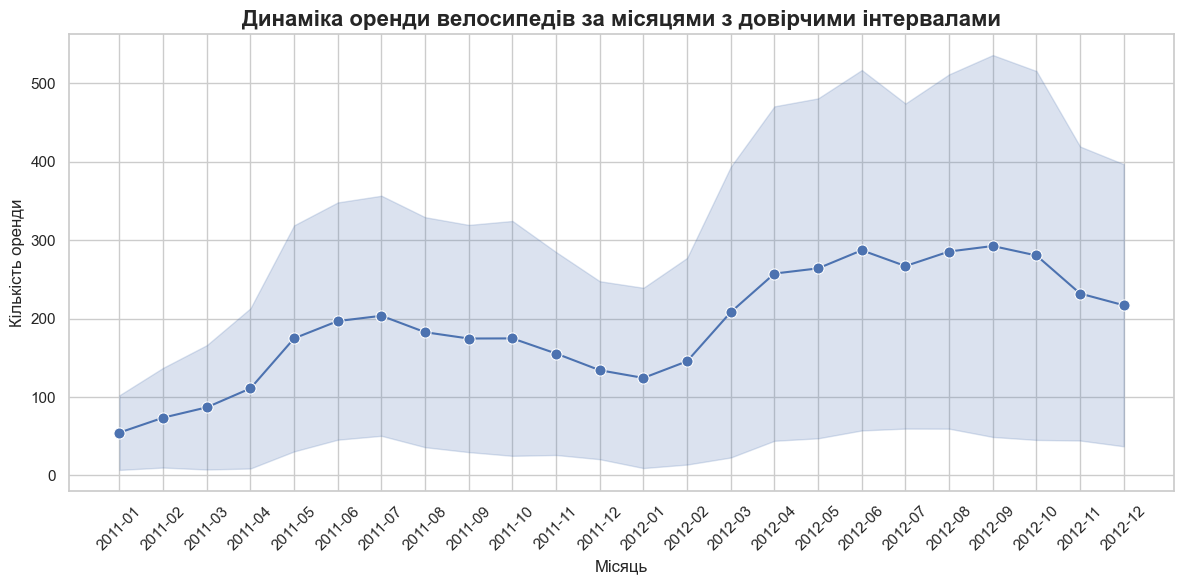

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(df, x='month_year', y='count', errorbar='sd', marker='o', markersize=8);
plt.title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами', fontweight='bold', fontsize=16)
plt.xlabel('Місяць')
plt.ylabel('Кількість оренди')
plt.xticks(rotation=45)
plt.tight_layout();

**В які місяці найбільша невизначеність в даних?**.  
Найбільша невизначеність — у теплі місяці обох років:    
2011: травень–липень (05–07).   
2012: квітень–вересень (04–09). В цьому році невизначеність вища.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

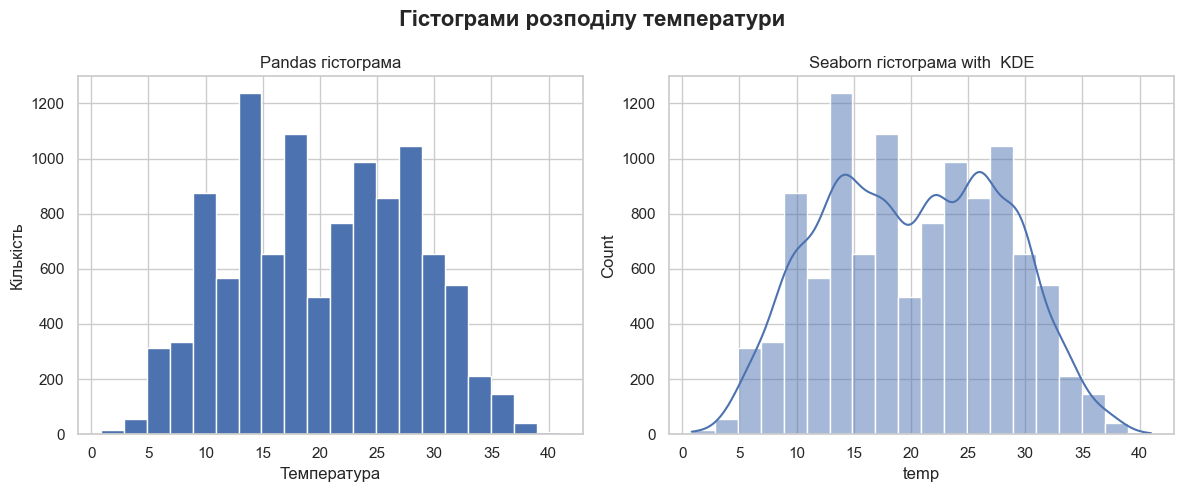

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].hist(df.temp, bins=20);
ax[0].set_title('Pandas гістограма')
ax[0].set_xlabel('Температура')
ax[0].set_ylabel('Кількість')

sns.histplot(df.temp, bins=20, kde=True);
ax[1].set_title('Seaborn гістограма with  KDE')
fig.suptitle('Гістограми розподілу температури', fontweight='bold', fontsize=16)
fig.tight_layout();

**Яка візуальна різниця між Pandas та Seaborn гістограмами?**.  
Pandas - відсутні підписи осей. Колір, стиль, межі — стандартні, строгі, не додає прозорості.
Seaborn - додає підписи осей та прозорість. Додана плавна крива KDE, що показує форму розподілу.    
**Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?**.  
**Крива KDE (Kernel Density Estimate)** крива щільності. Гладка крива, що показує, як дані розподілені, але без різких бінів( "згладжена" версія гістограми).


## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

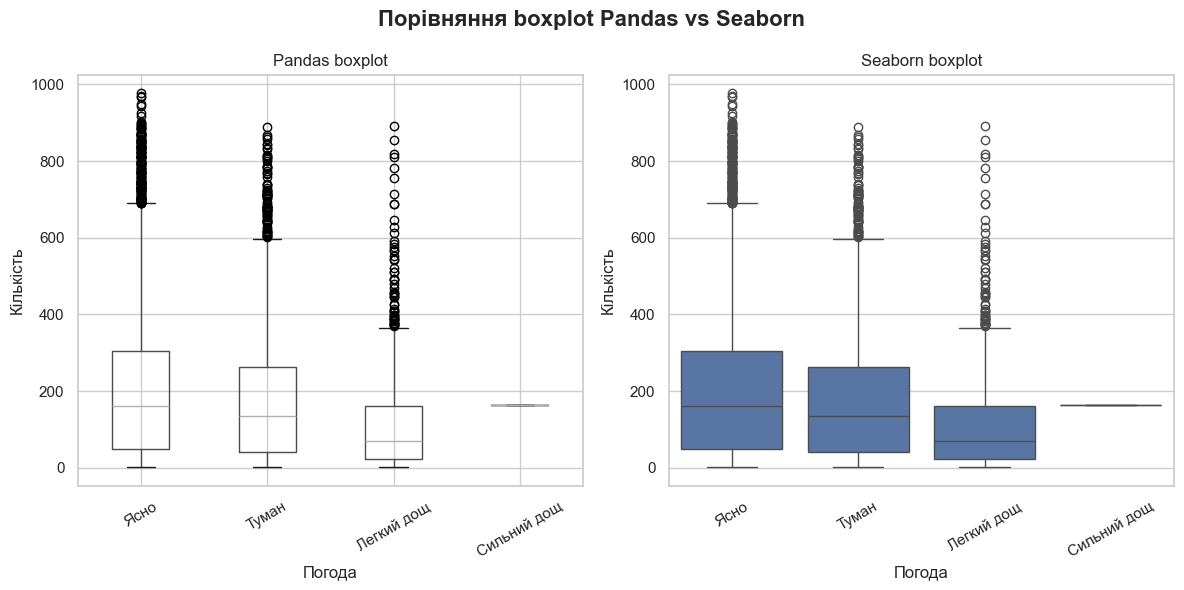

In [151]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
df.boxplot(column ='count', by = 'weather', ax = ax[0])
ax[0].set_xlabel('Погода')
ax[0].set_xticklabels(['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'], rotation = 30);
ax[0].set_ylabel('Кількість')
ax[0].set_title('Pandas boxplot')

ax[1] = sns.boxplot(data = df, x ='weather', y = 'count')
ax[1].set_xlabel('Погода')
ax[1].set_xticks(range(0, 4))
ax[1].set_xticklabels(['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'], rotation = 30);
ax[1].set_ylabel('Кількість')
ax[1].set_title('Seaborn boxplot')

fig.suptitle('Порівняння boxplot Pandas vs Seaborn', fontweight='bold', fontsize=16)
fig.tight_layout();

**Яка візуальна різниця між Pandas та Seaborn бокс-плотами?**.   
Pandas boxplot вигляд більш “класичним”, мінімальне стилювання, без кольорів, менш естетичний, більше про базову статистику. Автматично створює тікети (мітки осей), тому легше ставити свої підписи.    
Seaborn boxplot має більш стильний вигляд, ширші коробки, автоматичне застосування кольорів для категорій, легше читати. Але потрібно вручну додавати мітки осей, щоб переназвати.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


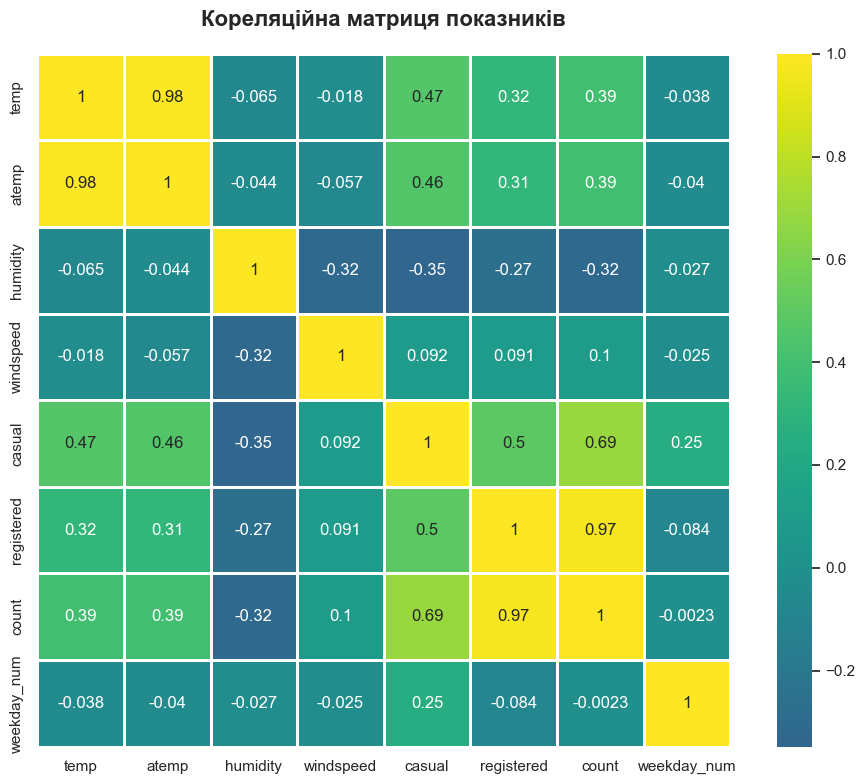

In [204]:
plt.figure(figsize = (10, 8))
sns.heatmap(df [['temp', 'atemp','humidity', 'windspeed', 'casual', 'registered', 'count', 'weekday_num']].corr(), annot=True, cmap='viridis', center=0,
            square=True, linewidths=1 )
plt.title('Кореляційна матриця показників', fontweight='bold', fontsize=16, pad =20)
plt.tight_layout();

In [187]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date', 'day',
       'week', 'weekday_num', 'weekday', 'year', 'month', 'hour',
       'month_year'],
      dtype='object')

sns.heatmap(df.select_dtypes('number').corr()); можна обрати всі числові стовпці, але щоб не перенавантажувати графік обрала найбільш релевантні стовпці.

**1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?**
Найбільше корелюють з 'count'(кількість оренди):
	•	registered — 0.97
	•	casual — 0.69
	•	temp — 0.39
	•	atemp — 0.39
Отже, найбільший внесок роблять зареєстровані користувачі.   
**2. Яка кореляція між temp та atemp? Чому?**.  
Кореляція = 0.98 — майже ідеальна між temp та atemp.
atemp — це “відчутна температура”, яка розраховується на основі реальної температури (temp), вологості та вітру.Тобто atemp змінна походить від temp.   
**3. Які змінні мають негативну кореляцію?**.  
Негативні значення у матриці:
 **humidity (вологість)** з temp (−0.065), atemp (−0.044), casual (−0.35), registered (−0.27), count (−0.32). 
Тобто найбільш помітна негативна кореляція — між humidity (вологістю) та кількістю оренд (вологість найбільше впливає на кількість незареєстрованих користувачив).

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


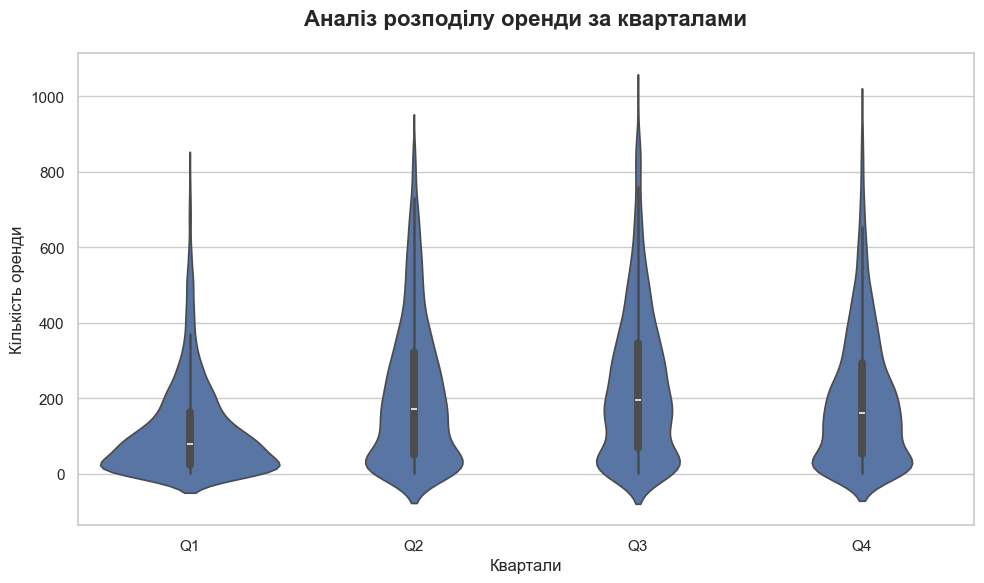

In [222]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='season', y='count');
plt.xticks(sorted(df.season.unique() - 1), ['Q1', 'Q2', 'Q3', 'Q4']);
plt.title('Аналіз розподілу оренди за кварталами', fontweight='bold', fontsize=16, pad =20)
plt.xlabel('Квартали')
plt.ylabel('Кількість оренди')
plt.tight_layout()

**Що показує "товщина" violin plot?**.  
Товщина показує щільність розподілу: де значень більше — графік ширший.   
**В якому кварталі найбільша варіабельність оренди?**.  
Найбільш розтягнутий по вертикалі (тобто найбільше коливання значень) - Q3 (літо).    
**Яка перевага violin plot над звичайним box plot?**.  
Violin plot показує не лише медіану й квартилі, а повну форму розподілу — де даних багато, де мало, чи є кілька піків, асиметрія, “хвости”. Він дає детальніше уявлення про варіабельність і структуру даних, ніж box plot, який показує тільки ключові статистики.

## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

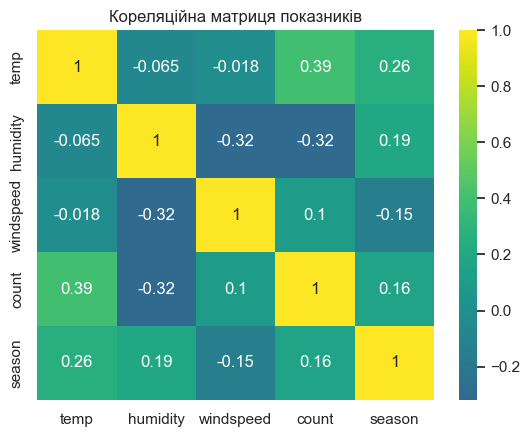

In [240]:
#Для перевірки взаємозв'язку
df[['temp', 'humidity', 'windspeed', 'count', 'season']].corr()
sns.heatmap(df[['temp', 'humidity', 'windspeed', 'count', 'season']].corr(), annot=True, cmap='viridis', center=0)
plt.title('Кореляційна матриця показників');

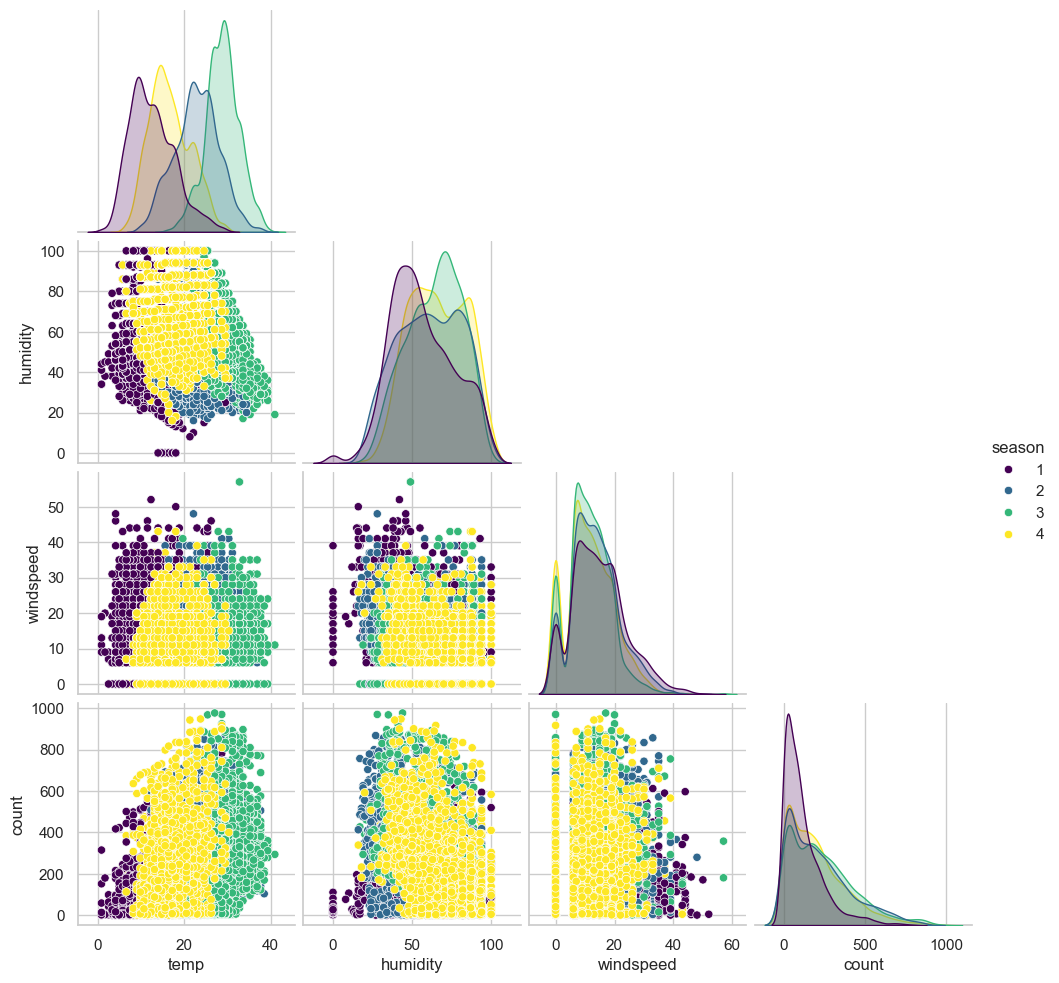

In [250]:
sns.pairplot(df[['temp', 'humidity', 'windspeed', 'count', 'season']], hue='season', corner=True, palette='viridis');

**Між якими змінними спостерігається найсильніший лінійний зв'язок?**.  
Найсильніший лінійний зв’язок: між temp - count( температура - кількість оренди). Тут найчіткіше видно зростання: що тепліше, то більше оренд. Точки формують виражений висхідний тренд.    
Другий за силою (негативний): humidity - count (вологість - кількість оренди). При вищій вологості кількість оренд помітно нижча. Точки утворюють спадний нахил(слабший).   
Отже, найсильніша лінійна кореляція — між temp та count.   
**Яка характеристика найбільше відрізняється між кварталами?**
Температура найбільше відрізняється між кварталами.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

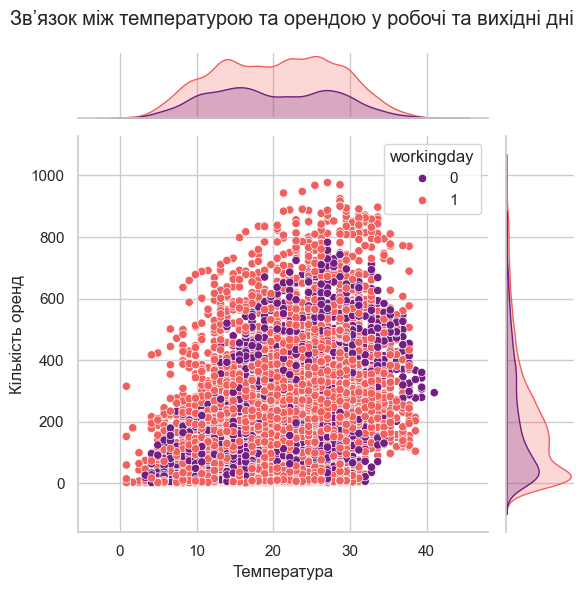

In [277]:
sns.jointplot(data=df, x='temp', y='count', hue='workingday', palette='magma');
plt.xlabel("Температура")
plt.ylabel("Кількість оренд")
plt.suptitle("Зв’язок між температурою та орендою у робочі та вихідні дні");
plt.tight_layout()


**Що показують графіки по краях?**.  
Це графіки розподілу щільності (згладжена гістограма) для кожної змінної: вгорі — розподіл температури окремо для робочих (1) і неробочих (0) днів. Праворуч — розподіл кількості оренд для робочих і неробочих днів.  
Вони показують: як часто зустрічаються різні значення температури, при яких значеннях відбувається більше/менше оренд, чи відрізняються розподіли між групами.   
**Чи є різниця у поведінці користувачів у робочий і неробочий день?**.  
У будні дні більш високі значення оренди при тій самій температурі (на графіку видно більше рожевих точок у верхній частині 600–900 оренд)
У вихідні дні:кількість оренди зосереджені нижче (менше піків у дуже високих значеннях).   
Будні дні мають тенденцію до більшої кількості оренд при однаковій температурі, особливо в теплу погоду (ймовірно, клієнти частіше використовують велосипед як транспортний засіб, щоб дістатися на роботу або навчання)